# PCA through Singular Value Decomposition

In [10]:
import numpy as np

# Defined 3 points in 2D-space:
X = np.array([[2, 1, 0], [4, 3, 0]])

# Calculate the covariance matrix:
R = np.cov(X)

# Calculate the SVD decomposition and new basis vectors:
[U, D, V] = np.linalg.svd(R)  # call SVD decomposition
u1 = U[:, 0]  # new basis vectors
u2 = U[:, 1]

# Calculate the coordinates in new orthonormal basis:
Xi1 = np.dot(u1, X)
Xi2 = np.dot(u2, X)

# Calculate the approximation of the original from new basis
X_approx = np.outer(u1, Xi1) + np.outer(u2, Xi2)

# Check that you got the original
print("Original Matrix:")
print(X)
print("Reconstructed Matrix:")
print(X_approx)


Original Matrix:
[[2 1 0]
 [4 3 0]]
Reconstructed Matrix:
[[ 2.  1. -0.]
 [ 4.  3.  0.]]


# PCA on Iris data

In [11]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

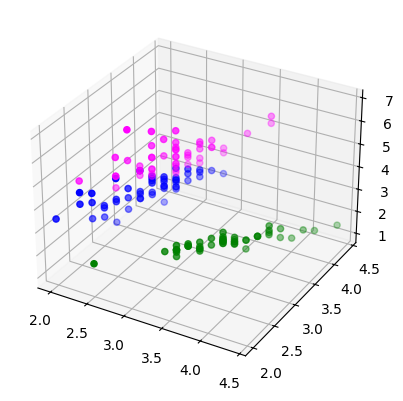

In [12]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


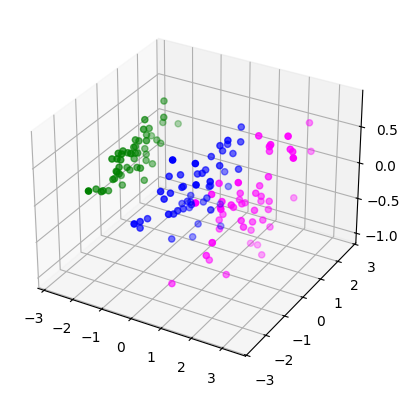

In [13]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)

# Define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)

# Print covariance matrix
print(pca.get_covariance())

# You can plot the transformed feature space in 3D:
axes2 = plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0], Xpca[y==0,1], Xpca[y==0,2], color='green')
axes2.scatter3D(Xpca[y==1,0], Xpca[y==1,1], Xpca[y==1,2], color='blue')
axes2.scatter3D(Xpca[y==2,0], Xpca[y==2,1], Xpca[y==2,2], color='magenta')
plt.show()


In [14]:
print("Explained Variance:", pca.explained_variance_)

Explained Variance: [2.93808505 0.9201649  0.14774182]


In [15]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.72962445 0.22850762 0.03668922]


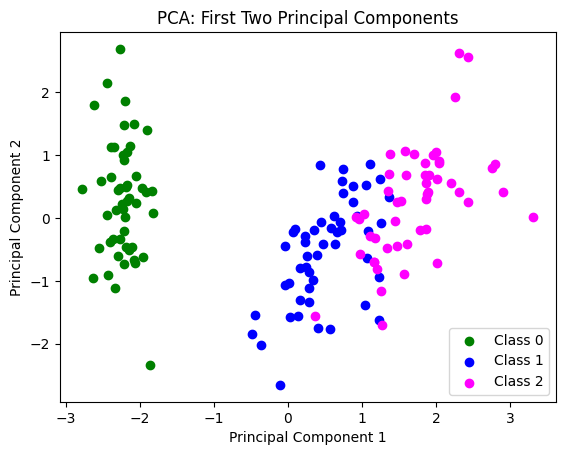

In [16]:
# Plot the principal components in 2D, mark different targets in color
plt.figure()
plt.scatter(Xpca[y==0, 0], Xpca[y==0, 1], color='green', label='Class 0')
plt.scatter(Xpca[y==1, 0], Xpca[y==1, 1], color='blue', label='Class 1')
plt.scatter(Xpca[y==2, 0], Xpca[y==2, 1], color='magenta', label='Class 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA: First Two Principal Components')
plt.show()

# KNN classifier

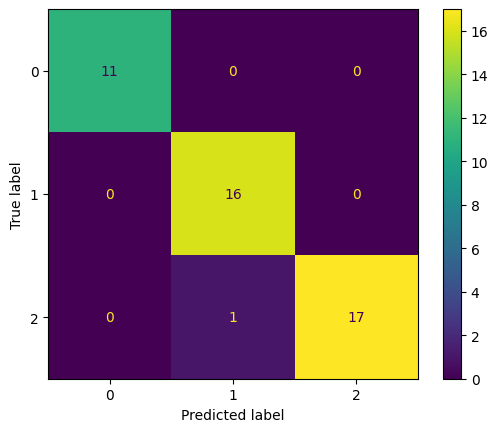

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

iris = load_iris()
X = iris.data
y = iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN classifier on full 4-dimensional X
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
Ypred = knn1.predict(X_test)

# Show confusion matrix
cm1 = confusion_matrix(y_test, Ypred)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)
plt.show()


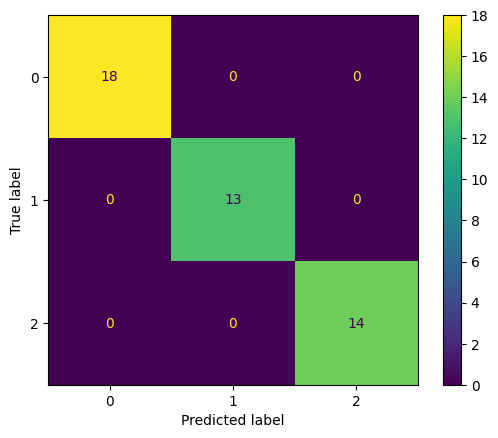

In [36]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (first two principal components)
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)
pca = decomposition.PCA(n_components=2)
Xpca = pca.fit_transform(Xpp)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(Xpca, y, test_size=0.3)
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_pca, y_train)
Ypred_pca = knn2.predict(X_test_pca)

# Show confusion matrix for PCA-transformed data
cm2 = confusion_matrix(y_test, Ypred_pca)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred_pca)
plt.show()


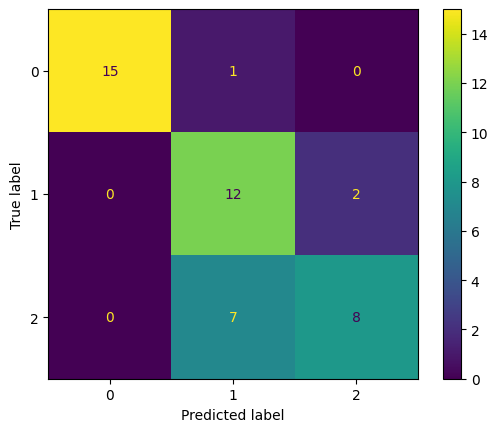

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train_2D, X_test_2D, y_train, y_test = train_test_split(X[:, :2], y, test_size=0.3)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_2D, y_train)
Ypred_2D = knn3.predict(X_test_2D)

# Show confusion matrix for 2D data
cm3 = confusion_matrix(y_test, Ypred_2D)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred_2D)
plt.show()
